In [1]:
from imports import *

C:\ProgramData\Miniconda3\envs\keras\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
cmap=plt.cm.get_cmap('prism')
cmap=plt.cm.get_cmap('Paired')
cmap=plt.cm.get_cmap('nipy_spectral')

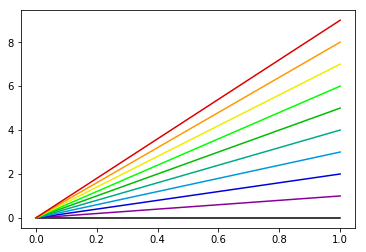

In [3]:
x = np.array([0,1])
for i in range(10):
    y = i*x
    plt.plot(x,y, color=cmap(0.1*i))

#### Plot Masks

In [4]:
from glob import glob

In [7]:
masks = glob("input/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/*")

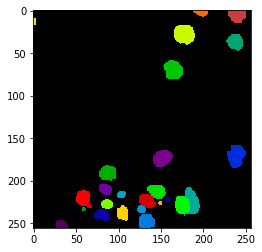

In [24]:
final = np.zeros((256, 256, 3))
for i in range(len(masks)):
    msk = plt.imread(masks[i])
    final[:,:,0] += msk*cmap(i/len(masks))[0]
    final[:,:,1] += msk*cmap(i/len(masks))[1]
    final[:,:,2] += msk*cmap(i/len(masks))[2]

#### build overall mask

In [41]:
final = np.zeros((256, 256))
for i in range(len(masks)):
    msk = plt.imread(masks[i])
    final += msk

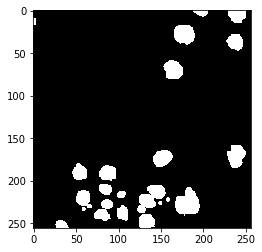

In [42]:
plt.imshow(final, cmap=plt.get_cmap("gray"))

#### From segmented to masks

In [44]:
import scipy 

In [45]:
labeled_array, num_features = scipy.ndimage.label(final)
num_features

23

In [51]:
masks = []
for i in range(1, num_features+1):
    masks.append(labeled_array==i)

In [53]:
# for mask in masks:
#     plt.figure()
#     plt.imshow(mask)

In [34]:
#### buimld contours

In [29]:
final = np.zeros((256, 256))
for i in range(len(masks)):
    msk = plt.imread(masks[i])
    msk = cv2.findContours(msk, 0.5, )
    final += msk

TypeError: Required argument 'mode' (pos 2) not found

In [32]:
_, contours, hierarchy = cv2.findContours(msk>0.5, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

TypeError: image data type = 0 is not supported

In [33]:
msk>0.5

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])